**Processing airline data Group 10**

In [1]:
import matplotlib.pyplot as plt


# grabbing all csvs in raw folder just because
raw = spark.read.options(header=True,inferSchema=True).csv('airplane_raw')
#raw.printSchema()
#print(raw.take(1))

**What are the busiest airports that people fly out of?**

In [2]:
from pyspark.sql.functions import min,max,mean 
import math
from pyspark.sql import functions as F
from pyspark.sql.types import FloatType
from pyspark.sql.functions import col
from pyspark.sql.types import FloatType
from pyspark.sql.functions import col

# simply counting records for origin airport (doesnt matter if these flights were cancelled or not, its about intent)

# need to read in metadata for airport names
airport_metadata = spark.read.options(inferSchema=True,header=True).csv('airplane_raw/metadata/airports.csv')
iata_airport_pairs = airport_metadata.select('iata', 'airport','lat', 'long')
# origin_top_10 = raw.select('Origin','Month').withColumnRenamed('Origin','iata')\
#                                     .groupBy('iata','Month')\
#                                     .count()\
#                                     .join(iata_airport_pairs,'iata','inner')\
#                                     .orderBy('count',ascending=False)
origin_top_10 = raw.select('Origin','Month').withColumnRenamed('Origin','iata')\
                                    .groupBy('iata','Month')\
                                    .count()\
                                    .join(iata_airport_pairs,'iata','inner')\
                                    .orderBy('count',ascending=False)
origin_top_10.withColumnRenamed('iata','Origin')
# origin_top_10.show()

lat_min = origin_top_10.select(min("lat")).collect()
for i in lat_min:
    lat_min = i[0]
long_min = origin_top_10.select(min("long")).collect()
for i in long_min:
    long_min = i[0]
lat_max = origin_top_10.select(max("lat")).collect()
for i in lat_max:
    lat_max = i[0]
long_max = origin_top_10.select(max("long")).collect()
for i in long_max:
    long_max = i[0]
    
def normalize_lat(a):
    a = (a - lat_min) / (lat_max - lat_min)
    if a<0:
        return 0
    elif a>=1:
        return 1
    return float(a)

def normalize_long(a):
    a = (a - long_min) / (long_max - long_min)
    if a<0:
        return 0
    elif a>=1:
        return 1
    return float(a)


calc_normalize_lat = F.udf(lambda features : normalize_lat(features))
calc_normalize_long = F.udf(lambda features : normalize_long(features))

normalized_data = origin_top_10.withColumn('lat',calc_normalize_lat('lat'))
normalized_data = normalized_data.withColumn('long',calc_normalize_long('long'))
origin_top_10 = normalized_data

origin_top_10 = origin_top_10.withColumn("lat",origin_top_10.lat.cast(FloatType()))
origin_top_10 = origin_top_10.withColumn("long",origin_top_10.long.cast(FloatType()))

origin_top_10.show()



+----+-----+------+--------------------+---------+----------+
|iata|Month| count|             airport|      lat|      long|
+----+-----+------+--------------------+---------+----------+
| ORD|    3|556663|Chicago O'Hare In...|0.5415102|0.27536625|
| ORD|   10|548480|Chicago O'Hare In...|0.5415102|0.27536625|
| ORD|    1|546669|Chicago O'Hare In...|0.5415102|0.27536625|
| ORD|    4|540226|Chicago O'Hare In...|0.5415102|0.27536625|
| ORD|    8|536420|Chicago O'Hare In...|0.5415102|0.27536625|
| ORD|   12|534155|Chicago O'Hare In...|0.5415102|0.27536625|
| ORD|    7|531262|Chicago O'Hare In...|0.5415102|0.27536625|
| ORD|    5|525760|Chicago O'Hare In...|0.5415102|0.27536625|
| ORD|   11|518190|Chicago O'Hare In...|0.5415102|0.27536625|
| ORD|    6|516619|Chicago O'Hare In...|0.5415102|0.27536625|
| ATL|    3|514557|William B Hartsfi...|0.4110443|0.28615704|
| ORD|    9|507630|Chicago O'Hare In...|0.5415102|0.27536625|
| ATL|    1|505035|William B Hartsfi...|0.4110443|0.28615704|
| ATL|  

In [ ]:
# normalize xn = (x - min) / (max - min) 0:min 1:max

In [3]:
# from pyspark.sql.functions import min,max,mean 

# lat_min = origin_top_10.select(min("lat")).collect()
# for i in lat_min:
#     lat_min = i[0]
# long_min = origin_top_10.select(min("long")).collect()
# for i in long_min:
#     long_min = i[0]
# lat_max = origin_top_10.select(max("lat")).collect()
# for i in lat_max:
#     lat_max = i[0]
# long_max = origin_top_10.select(max("long")).collect()
# for i in long_max:
#     long_max = i[0]

# # print(long_min)
# # print(lat_max)
# # print(long_max)



In [3]:
print(lat_min)
print(long_min)
print(lat_max)
print(long_max)


7.367222
-176.6460306
71.2854475
145.621384


In [49]:
origin_top_10.show(5)

+----+-----+------+--------------------+---------+------------+
|iata|Month| count|             airport|      lat|        long|
+----+-----+------+--------------------+---------+------------+
| ORD|    3|556663|Chicago O'Hare In...|41.979595|-87.90446417|
| ORD|   10|548480|Chicago O'Hare In...|41.979595|-87.90446417|
| ORD|    1|546669|Chicago O'Hare In...|41.979595|-87.90446417|
| ORD|    4|540226|Chicago O'Hare In...|41.979595|-87.90446417|
| ORD|    8|536420|Chicago O'Hare In...|41.979595|-87.90446417|
+----+-----+------+--------------------+---------+------------+
only showing top 5 rows



In [5]:
# import math
# from pyspark.sql import functions as F
# from pyspark.sql.types import FloatType
# from pyspark.sql.functions import col


# def normalize_lat(a):
#     a = (a - lat_min) / (lat_max - lat_min)
#     if a<0:
#         return 0
#     elif a>=1:
#         return 1
#     return float(a)

# def normalize_long(a):
#     a = (a - long_min) / (long_max - long_min)
#     if a<0:
#         return 0
#     elif a>=1:
#         return 1
#     return float(a)


# calc_normalize_lat = F.udf(lambda features : normalize_lat(features))
# calc_normalize_long = F.udf(lambda features : normalize_long(features))

# normalized_data = origin_top_10.withColumn('lat',calc_normalize_lat('lat'))
# normalized_data = normalized_data.withColumn('long',calc_normalize_long('long'))
# origin_top_10 = normalized_data
# origin_top_10.show()

+----+-----+------+--------------------+-------------------+-------------------+
|iata|Month| count|             airport|                lat|               long|
+----+-----+------+--------------------+-------------------+-------------------+
| ORD|    3|556663|Chicago O'Hare In...| 0.5415102301299025|0.27536624061153214|
| ORD|   10|548480|Chicago O'Hare In...| 0.5415102301299025|0.27536624061153214|
| ORD|    1|546669|Chicago O'Hare In...| 0.5415102301299025|0.27536624061153214|
| ORD|    4|540226|Chicago O'Hare In...| 0.5415102301299025|0.27536624061153214|
| ORD|    8|536420|Chicago O'Hare In...| 0.5415102301299025|0.27536624061153214|
| ORD|   12|534155|Chicago O'Hare In...| 0.5415102301299025|0.27536624061153214|
| ORD|    7|531262|Chicago O'Hare In...| 0.5415102301299025|0.27536624061153214|
| ORD|    5|525760|Chicago O'Hare In...| 0.5415102301299025|0.27536624061153214|
| ORD|   11|518190|Chicago O'Hare In...| 0.5415102301299025|0.27536624061153214|
| ORD|    6|516619|Chicago O

In [6]:
# from pyspark.sql.types import FloatType
# from pyspark.sql.functions import col
# origin_top_10 = origin_top_10.withColumn("lat",origin_top_10.lat.cast(FloatType()))
# origin_top_10 = origin_top_10.withColumn("long",origin_top_10.long.cast(FloatType()))


In [4]:
# PASS centroids, cluster_K, and the field name with features
from pyspark.ml.linalg import Vectors
import pyspark.sql.functions as F
from pyspark.sql import functions as F
from pyspark.sql import SparkSession, Row
from scipy.spatial import distance

import numpy as np

def Add_Distance_To_Cluster_DF(passed_centroid_feature,cluster_NUMBER,Feature_Field_Name, CLUSTER_NUMBER):
    if CLUSTER_NUMBER == None:
        cluster_NUMBER_center = {int(i):[float(passed_centroid_feature[i][j]) for j in range(len(passed_centroid_feature[i]))] 
              for i in range(len(passed_centroid_feature))}
        cluster_NUMBER_newDF_to_add = spark.sparkContext.parallelize([(k,)+(v,) for k,v in cluster_NUMBER_center.items()]).toDF(['prediction','center'])
        cluster_NUMBER = cluster_NUMBER.withColumn('prediction',F.col('prediction'))
        cluster_NUMBER = cluster_NUMBER.join(cluster_NUMBER_newDF_to_add,on='prediction',how='left')

    elif CLUSTER_NUMBER != None:
        cluster_NUMBER_center = {}
        cluster_NUMBER_center[CLUSTER_NUMBER] =  [float(passed_centroid_feature[0][0]),float(passed_centroid_feature[0][1])]
        cluster_NUMBER_newDF_to_add = spark.sparkContext.parallelize([(k,)+(v,) for k,v in 
        cluster_NUMBER_center.items()]).toDF(['prediction','center'])
        cluster_NUMBER = cluster_NUMBER.withColumn('prediction',F.col('prediction'))
        cluster_NUMBER = cluster_NUMBER.join(cluster_NUMBER_newDF_to_add,on='prediction',how='left')
    
    # ADDS DISTANCE
    # get_dist = F.udf(lambda features, center : 
    #                  float(np.linalg.norm(features-center)))  
    get_dist = F.udf(lambda features, center : 
                     float(features.squared_distance(center)))
    
    cluster_NUMBER = cluster_NUMBER.withColumn('distance',get_dist(F.col(Feature_Field_Name),F.col('center')))

    return cluster_NUMBER

# To get the value of the hi
# Pass the iteration value here e.g 
# RETURN : returns just the value in array [1,1]
def get_Highest_Value_cluster_K(cluster_0_first_iteration):
    cluster_first_k_Value = cluster_0_first_iteration.orderBy(F.desc("distance")).take(1)
    spark = SparkSession.builder.getOrCreate()
    cluster_first_k_Value_DF = spark.createDataFrame(cluster_first_k_Value)
    # cluster_first_k_Value_DF.show()

    # Get the cluster value that are nested
    cluster_0_first_Value = cluster_first_k_Value[0][5]
    # cluster_0_first_Value

    # Converts features of max row into array so it can work with Add_Distance_To_Cluster_DF
    cluster_first_k_Value_max =  np.array(cluster_first_k_Value_DF.select('busy_season_fly_out_of_features').collect())
    cluster_first_k_Value_max = cluster_first_k_Value_max[0]

    return cluster_first_k_Value_max

# This creates a list of the row with max distance
# Pass the iteration value here e.g 
# RETURN : returns complete row of the max value
def get_row_of_highest_value_in_distance_k(cluster_0_first_iteration):
    cluster_first_k_Value = cluster_0_first_iteration.orderBy(F.desc("distance")).take(1)
    spark = SparkSession.builder.getOrCreate()
    cluster_first_k_Value_DF = spark.createDataFrame(cluster_first_k_Value)
    return cluster_first_k_Value_DF

In [5]:
from pyspark.ml.feature import VectorAssembler

assemble = VectorAssembler(inputCols=[
'long',
'lat'],outputCol = 'busy_season_fly_out_of_features')

busy_season_fly_out_of_data = assemble.transform(origin_top_10)
busy_season_fly_out_of_data.show()

+----+-----+------+--------------------+---------+----------+-------------------------------+
|iata|Month| count|             airport|      lat|      long|busy_season_fly_out_of_features|
+----+-----+------+--------------------+---------+----------+-------------------------------+
| ORD|    3|556663|Chicago O'Hare In...|0.5415102|0.27536625|           [0.27536624670028...|
| ORD|   10|548480|Chicago O'Hare In...|0.5415102|0.27536625|           [0.27536624670028...|
| ORD|    1|546669|Chicago O'Hare In...|0.5415102|0.27536625|           [0.27536624670028...|
| ORD|    4|540226|Chicago O'Hare In...|0.5415102|0.27536625|           [0.27536624670028...|
| ORD|    8|536420|Chicago O'Hare In...|0.5415102|0.27536625|           [0.27536624670028...|
| ORD|   12|534155|Chicago O'Hare In...|0.5415102|0.27536625|           [0.27536624670028...|
| ORD|    7|531262|Chicago O'Hare In...|0.5415102|0.27536625|           [0.27536624670028...|
| ORD|    5|525760|Chicago O'Hare In...|0.5415102|0.27536625

## Bisecting K Means and Silhoutte score

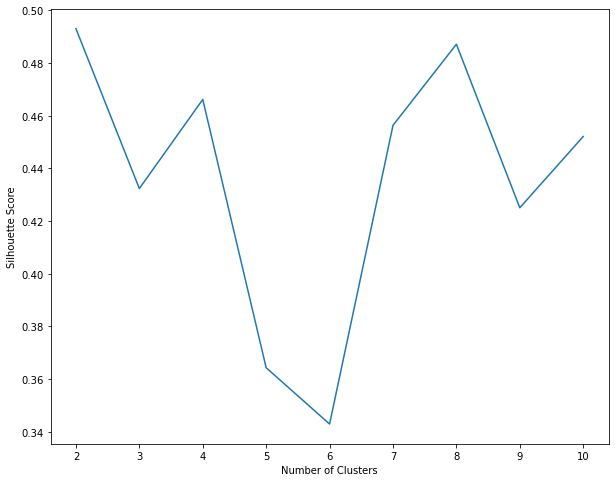

In [6]:
## Add Vector Assembler for silhouette score

# from pyspark.ml.feature import VectorAssembler

# assemble = VectorAssembler(inputCols=[
# 'long',
# 'lat'],outputCol = 'busy_season_fly_out_of_features')

# busy_season_fly_out_of_data = assemble.transform(origin_top_10)
# busy_season_fly_out_of_data.show()


# Silhoute Score before CLustering - This takes 10 mins to execute

from pyspark.ml.clustering import BisectingKMeans
from pyspark.ml.evaluation import ClusteringEvaluator

silhouette_scores=[]
evaluator = ClusteringEvaluator(featuresCol='busy_season_fly_out_of_features', \
metricName='silhouette')
for K in range(2,11):

    BKMeans_=BisectingKMeans(featuresCol='busy_season_fly_out_of_features', k=K, minDivisibleClusterSize =1)

    BKMeans_fit=BKMeans_.fit(busy_season_fly_out_of_data)

    BKMeans_transform=BKMeans_fit.transform(busy_season_fly_out_of_data) 

    evaluation_score=evaluator.evaluate(BKMeans_transform)

    silhouette_scores.append(evaluation_score)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(10,8))
ax.plot(range(2,11),silhouette_scores)
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Score')


### BisectingKMeans/Hierarchical Clustering

BKMeans_=BisectingKMeans(featuresCol='busy_season_fly_out_of_features', k=3) 
BKMeans_Model=BKMeans_.fit(busy_season_fly_out_of_data)
BKMeans_transform=BKMeans_Model.transform(busy_season_fly_out_of_data)
# BKMeans_transform.show()

centroids = BKMeans_Model.clusterCenters()

In [7]:
centroids

[array([0.26866277, 0.37380894]),
 array([0.25218789, 0.54701842]),
 array([0.07937965, 0.82922456])]

## Plot of clusters (X/Y axis are long and lat)
### scatters on X axis are months (Jan = 0, Feb = 1 and so on)

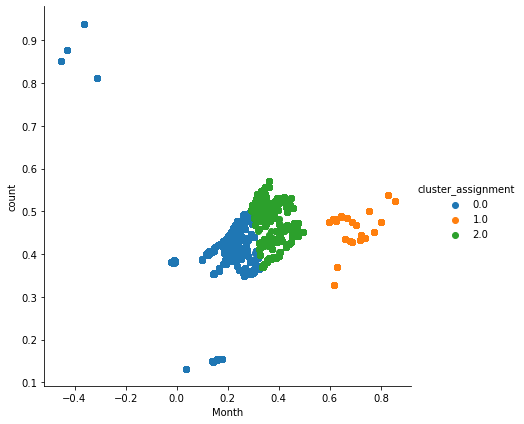

In [8]:
from pyspark.ml.feature import PCA as PCAml
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pca1 = PCAml(k=2, inputCol="busy_season_fly_out_of_features", outputCol="pca")
# pca_model = pca.fit(busy_season_fly_out_of_data)
pca_model1 = pca1.fit(BKMeans_transform)

pca_transformed1 = pca_model1.transform(busy_season_fly_out_of_data)

X_pca1 = pca_transformed1.rdd.map(lambda row: row.pca).collect()
X_pca1 = np.array(X_pca1)

# Retrieve cluster assigned from the above clustering
cluster_assignment1 = np.array(BKMeans_transform.rdd.map(lambda row: row.prediction).collect()).reshape(-1,1)


# Plotting the data
pca_data1 = np.hstack((X_pca1,cluster_assignment1))

pca_df = pd.DataFrame(data=pca_data1, columns=("Month", "count","cluster_assignment"))
sns.FacetGrid(pca_df,hue="cluster_assignment", height=6).map(plt.scatter, "Month", "count").add_legend()
plt.show()

### Processing clusters to get K representative points

In [8]:
cluster_0 = BKMeans_transform.filter(BKMeans_transform.prediction==0)
cluster_1 = BKMeans_transform.filter(BKMeans_transform.prediction==1)
cluster_2 = BKMeans_transform.filter(BKMeans_transform.prediction==2)


In [9]:
BKMeans_transform.filter(BKMeans_transform.prediction==1).show()

+----+-----+------+--------------------+----------+----------+-------------------------------+----------+
|iata|Month| count|             airport|       lat|      long|busy_season_fly_out_of_features|prediction|
+----+-----+------+--------------------+----------+----------+-------------------------------+----------+
| ORD|    3|556663|Chicago O'Hare In...| 0.5415102|0.27536625|           [0.27536624670028...|         1|
| ORD|   10|548480|Chicago O'Hare In...| 0.5415102|0.27536625|           [0.27536624670028...|         1|
| ORD|    1|546669|Chicago O'Hare In...| 0.5415102|0.27536625|           [0.27536624670028...|         1|
| ORD|    4|540226|Chicago O'Hare In...| 0.5415102|0.27536625|           [0.27536624670028...|         1|
| ORD|    8|536420|Chicago O'Hare In...| 0.5415102|0.27536625|           [0.27536624670028...|         1|
| ORD|   12|534155|Chicago O'Hare In...| 0.5415102|0.27536625|           [0.27536624670028...|         1|
| ORD|    7|531262|Chicago O'Hare In...| 0.541

In [10]:
cluster_2.show()

+----+-----+-----+--------------------+----------+----------+-------------------------------+----------+
|iata|Month|count|             airport|       lat|      long|busy_season_fly_out_of_features|prediction|
+----+-----+-----+--------------------+----------+----------+-------------------------------+----------+
| ANC|    7|43063|Ted Stevens Ancho...|0.84181154|0.08269482|           [0.08269482105970...|         2|
| ANC|    8|42652|Ted Stevens Ancho...|0.84181154|0.08269482|           [0.08269482105970...|         2|
| ANC|    6|39378|Ted Stevens Ancho...|0.84181154|0.08269482|           [0.08269482105970...|         2|
| ANC|    9|32663|Ted Stevens Ancho...|0.84181154|0.08269482|           [0.08269482105970...|         2|
| ANC|    5|30678|Ted Stevens Ancho...|0.84181154|0.08269482|           [0.08269482105970...|         2|
| ANC|   10|29464|Ted Stevens Ancho...|0.84181154|0.08269482|           [0.08269482105970...|         2|
| ANC|    3|28269|Ted Stevens Ancho...|0.84181154|0.082

In [11]:
# ## Add Vector Assembler for silhouette score

# PASS centroids, cluster_K, and the field name with features
from pyspark.ml.linalg import Vectors
import pyspark.sql.functions as F
from pyspark.sql import functions as F
from pyspark.sql import SparkSession, Row
import numpy as np

##################################################
##################################################
#####
##### Cluster 1
#####
##################################################
##################################################

################################################ FIRST ITERATION
cluster_0_first_iteration = Add_Distance_To_Cluster_DF(centroids,cluster_0,'busy_season_fly_out_of_features', None)
# cluster_0_first_iteration.show()


cluster_0_first_k_Value = get_Highest_Value_cluster_K(cluster_0_first_iteration) # THIS JUST GETS THE MAX DIST VALUES THAT WILL BE USED AS CENTER FOR NEXT ITERATION
# the value below will be stored in a list and used in processing dataset again
cluster_0_first_k_Value_row = get_row_of_highest_value_in_distance_k(cluster_0_first_iteration)
# cluster_first_k_Value_row



################################################ SECOND ITERATION
CENTER_FEATURE_POINTS_FOR_SECOND_ITERATION = cluster_0_first_k_Value
CURRENT_CLUSTER_BEING_PROCESSED = cluster_0
CLUSTER_K_BEING_PROCESSED = None # for 0 its None

cluster_0_second_iteration = Add_Distance_To_Cluster_DF(CENTER_FEATURE_POINTS_FOR_SECOND_ITERATION,CURRENT_CLUSTER_BEING_PROCESSED,'busy_season_fly_out_of_features',CLUSTER_K_BEING_PROCESSED)
# cluster_0_second_iteration.show()

cluster_0_second_k_Value = get_Highest_Value_cluster_K(cluster_0_second_iteration) # THIS JUST GETS THE MAX DIST VALUES THAT WILL BE USED AS CENTER FOR NEXT ITERATION
# the value below will be stored in a list and used in processing dataset again
cluster_0_second_k_Value_row = get_row_of_highest_value_in_distance_k(cluster_0_second_iteration)
#cluster_0_second_k_Value


# For third iterations distance - lets just subtrack the max value of first and second iteration and use that as center

# passed max values are nested array ->
center_for_third= (abs(cluster_0_first_k_Value[0]-cluster_0_second_k_Value[0]))
temp_val = cluster_0_second_k_Value.copy()
a = center_for_third[0]
b = center_for_third[1]
temp_val[0][0] = a.copy()
temp_val[0][1] = b.copy()
temp_val
center_for_third = temp_val.copy()
center_for_third   ### <---- This value is used to find the third k


################################################ THIRD ITERATION
CENTER_FEATURE_POINTS_FOR_SECOND_ITERATION = center_for_third
CURRENT_CLUSTER_BEING_PROCESSED = cluster_0
CLUSTER_K_BEING_PROCESSED = None # for 0 its None

cluster_0_third_iteration = Add_Distance_To_Cluster_DF(CENTER_FEATURE_POINTS_FOR_SECOND_ITERATION,CURRENT_CLUSTER_BEING_PROCESSED,'busy_season_fly_out_of_features',CLUSTER_K_BEING_PROCESSED)
# cluster_0_third_iteration.show()
# CENTER_FEATURE_POINTS_FOR_THIRD_ITERATION = center_for_third
# cluster_0_third_iteration = Add_Distance_To_Cluster_DF(CENTER_FEATURE_POINTS_FOR_THIRD_ITERATION, cluster_0, 'busy_season_fly_out_of_features')
# cluster_0_third_iteration.show()

cluster_0_third_k_Value = get_Highest_Value_cluster_K(cluster_0_third_iteration) # THIS JUST GETS THE MAX DIST VALUES THAT WILL BE USED AS CENTER FOR NEXT ITERATION
# the value below will be stored in a list and used in processing dataset again

cluster_0_third_k_Value_row = get_row_of_highest_value_in_distance_k(cluster_0_third_iteration)
cluster_0_third_k_Value


##################################################
##################################################
#####
##### Cluster 2
#####
##################################################
##################################################

################################### First Iteration
# first iteration has the last param as None always
cluster_1_first_iteration = Add_Distance_To_Cluster_DF(centroids,cluster_1,'busy_season_fly_out_of_features',None)
# cluster_1_first_iteration.show()


cluster_1_first_k_Value = get_Highest_Value_cluster_K(cluster_1_first_iteration) # THIS JUST GETS THE MAX DIST VALUES THAT WILL BE USED AS CENTER FOR NEXT ITERATION
# the value below will be stored in a list and used in processing dataset again
cluster_1_first_k_Value_row = get_row_of_highest_value_in_distance_k(cluster_1_first_iteration)
# cluster_first_k_Value_row

cluster_1_first_k_Value




################################### Second Iteration
CENTER_FEATURE_POINTS_FOR_SECOND_ITERATION = cluster_1_first_k_Value
CURRENT_CLUSTER_BEING_PROCESSED = cluster_1
CLUSTER_K_BEING_PROCESSED = 1 # for 0 its None

cluster_1_second_iteration = Add_Distance_To_Cluster_DF(CENTER_FEATURE_POINTS_FOR_SECOND_ITERATION,CURRENT_CLUSTER_BEING_PROCESSED,'busy_season_fly_out_of_features',CLUSTER_K_BEING_PROCESSED)

#cluster_1_second_iteration.show()

# CENTER_FEATURE_POINTS_FOR_SECOND_ITERATION = cluster_1_first_k_Value
# CURRENT_CLUSTER_BEING_PROCESSED = cluster_1
# cluster_1_second_iteration = Add_Distance_To_Cluster_DF(CENTER_FEATURE_POINTS_FOR_SECOND_ITERATION,CURRENT_CLUSTER_BEING_PROCESSED,'busy_season_fly_out_of_features')
# cluster_1_second_iteration.show()


cluster_1_second_k_Value = get_Highest_Value_cluster_K(cluster_1_second_iteration) # THIS JUST GETS THE MAX DIST VALUES THAT WILL BE USED AS CENTER FOR NEXT ITERATION
# the value below will be stored in a list and used in processing dataset again
cluster_1_second_k_Value_row = get_row_of_highest_value_in_distance_k(cluster_1_second_iteration)
cluster_1_second_k_Value


# For third iterations distance - lets just subtrack the max value of first and second iteration and use that as center

# passed max values are nested array ->
cluster_1_center_value_for_third= (abs(cluster_1_first_k_Value[0]-cluster_1_second_k_Value[0]))
temp_val = cluster_1_second_k_Value.copy()
a = cluster_1_center_value_for_third[0]
b = cluster_1_center_value_for_third[1]
temp_val[0][0] = a.copy()
temp_val[0][1] = b.copy()
temp_val
cluster_1_center_value_for_third = temp_val.copy()
cluster_1_center_value_for_third   ### <---- This value is used to find the third k

################################### Third Iteration
CENTER_FEATURE_POINTS_FOR_SECOND_ITERATION = cluster_1_center_value_for_third
CURRENT_CLUSTER_BEING_PROCESSED = cluster_1
CLUSTER_K_BEING_PROCESSED = 1 # for 0 its None

cluster_1_third_iteration = Add_Distance_To_Cluster_DF(CENTER_FEATURE_POINTS_FOR_SECOND_ITERATION,CURRENT_CLUSTER_BEING_PROCESSED,'busy_season_fly_out_of_features',CLUSTER_K_BEING_PROCESSED)

#cluster_1_third_iteration.show()
# cluster_1_third_iteration = Add_Distance_To_Cluster_DF(cluster_1_center_value_for_third,cluster_1,'busy_season_fly_out_of_features')
# cluster_1_third_iteration.show()



cluster_1_third_k_Value = get_Highest_Value_cluster_K(cluster_1_third_iteration) # THIS JUST GETS THE MAX DIST VALUES THAT WILL BE USED AS CENTER FOR NEXT ITERATION
# the value below will be stored in a list and used in processing dataset again

cluster_1_third_k_Value_row = get_row_of_highest_value_in_distance_k(cluster_1_third_iteration)
cluster_1_third_k_Value



# For third iterations distance - lets just subtrack the max value of first and second iteration and use that as center

# passed max values are nested array ->
cluster_1_center_value_for_fourth = (abs(cluster_1_first_k_Value[0]-cluster_1_second_k_Value[0]-cluster_1_third_k_Value[0]))
temp_val = cluster_1_second_k_Value.copy()
a = cluster_1_center_value_for_fourth[0]
b = cluster_1_center_value_for_fourth[1]
temp_val[0][0] = a.copy()
temp_val[0][1] = b.copy()
temp_val
cluster_1_center_value_for_fourth = temp_val.copy()
cluster_1_center_value_for_fourth   ### <---- This value is used to find the third k


##################################################
##################################################
#####
##### Cluster 3
#####
##################################################
##################################################

##################################### FIRST ITERATION

# first iteration has the last param as None always
cluster_2_first_iteration = Add_Distance_To_Cluster_DF(centroids,cluster_2,'busy_season_fly_out_of_features',None)
# cluster_1_first_iteration.show()


cluster_2_first_k_Value = get_Highest_Value_cluster_K(cluster_2_first_iteration) # THIS JUST GETS THE MAX DIST VALUES THAT WILL BE USED AS CENTER FOR NEXT ITERATION
# the value below will be stored in a list and used in processing dataset again
cluster_2_first_k_Value_row = get_row_of_highest_value_in_distance_k(cluster_2_first_iteration)
# cluster_first_k_Value_row

cluster_2_first_k_Value



##################################### SECOND ITERATION

CENTER_FEATURE_POINTS_FOR_SECOND_ITERATION = cluster_2_first_k_Value
CURRENT_CLUSTER_BEING_PROCESSED = cluster_2
CLUSTER_K_BEING_PROCESSED = 2 # for 0 its None

cluster_2_second_iteration = Add_Distance_To_Cluster_DF(CENTER_FEATURE_POINTS_FOR_SECOND_ITERATION,CURRENT_CLUSTER_BEING_PROCESSED,'busy_season_fly_out_of_features',CLUSTER_K_BEING_PROCESSED)

# cluster_2_second_iteration.show()



cluster_2_second_k_Value = get_Highest_Value_cluster_K(cluster_2_second_iteration) # THIS JUST GETS THE MAX DIST VALUES THAT WILL BE USED AS CENTER FOR NEXT ITERATION
# the value below will be stored in a list and used in processing dataset again
cluster_2_second_k_Value_row = get_row_of_highest_value_in_distance_k(cluster_2_second_iteration)
cluster_2_second_k_Value





# For third iterations distance - lets just subtrack the max value of first and second iteration and use that as center

# passed max values are nested array ->
cluster_2_center_value_for_third= (abs(cluster_2_first_k_Value[0]-cluster_2_second_k_Value[0]))
temp_val = cluster_2_first_k_Value.copy()
a = cluster_2_center_value_for_third[0]
b = cluster_2_center_value_for_third[1]
temp_val[0][0] = a.copy()
temp_val[0][1] = b.copy()
temp_val
cluster_2_center_value_for_third = temp_val.copy()
cluster_2_center_value_for_third   ### <---- This value is used to find the third k



##################################### THIRD ITERATION

CENTER_FEATURE_POINTS_FOR_SECOND_ITERATION = cluster_2_center_value_for_third
CURRENT_CLUSTER_BEING_PROCESSED = cluster_2
CLUSTER_K_BEING_PROCESSED = 2 # for 0 its None

cluster_2_third_iteration = Add_Distance_To_Cluster_DF(CENTER_FEATURE_POINTS_FOR_SECOND_ITERATION,CURRENT_CLUSTER_BEING_PROCESSED,'busy_season_fly_out_of_features',CLUSTER_K_BEING_PROCESSED)

# cluster_2_third_iteration.show()




cluster_2_third_k_Value = get_Highest_Value_cluster_K(cluster_2_third_iteration) # THIS JUST GETS THE MAX DIST VALUES THAT WILL BE USED AS CENTER FOR NEXT ITERATION
# the value below will be stored in a list and used in processing dataset again

cluster_2_third_k_Value_row = get_row_of_highest_value_in_distance_k(cluster_2_third_iteration)
cluster_2_third_k_Value



def move_fraction_closer_to_centroid(passed_cluster_k_value, passed_cluster, a , b):
    temp_a = 0
    temp_b = 0
    if float(passed_cluster_k_value[0][0]) >=  float(passed_cluster[0]):
        temp_a = passed_cluster_k_value[0][0] - a        
    if float(passed_cluster_k_value[0][1]) >=  float(passed_cluster[1]):
        temp_b = passed_cluster_k_value[0][1] - b
    if float(passed_cluster_k_value[0][0]) <  float(passed_cluster[0]):
        temp_a = passed_cluster_k_value[0][0] + a     
    if float(passed_cluster_k_value[0][1]) <  float(passed_cluster[1]):
        temp_b = passed_cluster_k_value[0][1] + a
        
    passed_cluster_k_value = [temp_a, temp_b]
    return passed_cluster_k_value


cluster_0_first_k_Value_temp = cluster_0_first_k_Value.copy()
cluster_0_second_k_Value_temp = cluster_0_second_k_Value.copy()
cluster_0_third_k_Value_temp = cluster_0_third_k_Value.copy()

cluster_centroid = centroids[0]

a = cluster_0_first_k_Value_temp[0][0] * 0.2
b = cluster_0_first_k_Value_temp[0][1] * 0.2

cluster_0_first_k_Value_temp = move_fraction_closer_to_centroid(cluster_0_first_k_Value_temp, cluster_centroid, a, b)
cluster_0_first_k_Value = {}
cluster_0_first_k_Value['features'] = cluster_0_first_k_Value_temp
cluster_0_first_k_Value['prediction'] = 0


a = cluster_0_second_k_Value_temp[0][0] * 0.2
b = cluster_0_second_k_Value_temp[0][1] * 0.2
cluster_0_second_k_Value_temp = move_fraction_closer_to_centroid(cluster_0_second_k_Value_temp, cluster_centroid, a, b)
cluster_0_second_k_Value = {}
cluster_0_second_k_Value['features'] = cluster_0_second_k_Value_temp
cluster_0_second_k_Value['prediction'] = 0


a = cluster_0_third_k_Value_temp[0][0] * 0.2
b = cluster_0_third_k_Value_temp[0][1] * 0.2
cluster_0_third_k_Value_temp = move_fraction_closer_to_centroid(cluster_0_third_k_Value_temp, cluster_centroid, a, b)
cluster_0_third_k_Value = {}
cluster_0_third_k_Value['features'] = cluster_0_third_k_Value_temp
cluster_0_third_k_Value['prediction'] = 0


cluster_1_first_k_Value_temp = cluster_1_first_k_Value.copy()
cluster_1_second_k_Value_temp = cluster_1_second_k_Value.copy()
cluster_1_third_k_Value_temp = cluster_1_third_k_Value.copy()

cluster_centroid = centroids[1]


a = cluster_1_first_k_Value_temp[0][0] * 0.2
b = cluster_1_first_k_Value_temp[0][1] * 0.2
cluster_1_first_k_Value_temp = move_fraction_closer_to_centroid(cluster_1_first_k_Value_temp, cluster_centroid, a, b)
cluster_1_first_k_Value = {}
cluster_1_first_k_Value['features'] = cluster_1_first_k_Value_temp
cluster_1_first_k_Value['prediction'] = 1

a = cluster_1_second_k_Value_temp[0][0] * 0.2
b = cluster_1_second_k_Value_temp[0][1] * 0.2
cluster_1_second_k_Value_temp = move_fraction_closer_to_centroid(cluster_1_second_k_Value_temp, cluster_centroid, a, b)
cluster_1_second_k_Value = {}
cluster_1_second_k_Value['features'] = cluster_1_second_k_Value_temp
cluster_1_second_k_Value['prediction'] = 1

a = cluster_1_third_k_Value_temp[0][0] * 0.2
b = cluster_1_third_k_Value_temp[0][1] * 0.2
cluster_1_third_k_Value_temp = move_fraction_closer_to_centroid(cluster_1_third_k_Value_temp, cluster_centroid, a, b)
cluster_1_third_k_Value = {}
cluster_1_third_k_Value['features'] = cluster_1_third_k_Value_temp
cluster_1_third_k_Value['prediction'] = 1



cluster_2_first_k_Value_temp = cluster_2_first_k_Value.copy()
cluster_2_second_k_Value_temp = cluster_2_second_k_Value.copy()
cluster_2_third_k_Value_temp = cluster_2_third_k_Value.copy()

cluster_centroid = centroids[2]


a = cluster_2_first_k_Value_temp[0][0] * 0.2
b = cluster_2_first_k_Value_temp[0][1] * 0.2
cluster_2_first_k_Value_temp = move_fraction_closer_to_centroid(cluster_2_first_k_Value_temp, cluster_centroid, a, b)
cluster_2_first_k_Value = {}
cluster_2_first_k_Value['features'] = cluster_2_first_k_Value_temp
cluster_2_first_k_Value['prediction'] = 2

a = cluster_2_second_k_Value_temp[0][0] * 0.2
b = cluster_2_second_k_Value_temp[0][1] * 0.2
cluster_2_second_k_Value_temp = move_fraction_closer_to_centroid(cluster_2_second_k_Value_temp, cluster_centroid, a, b)
cluster_2_second_k_Value = {}
cluster_2_second_k_Value['features'] = cluster_2_second_k_Value_temp
cluster_2_second_k_Value['prediction'] = 2

a = cluster_2_third_k_Value_temp[0][0] * 0.2
b = cluster_2_third_k_Value_temp[0][1] * 0.2
cluster_2_third_k_Value_temp = move_fraction_closer_to_centroid(cluster_2_third_k_Value_temp, cluster_centroid, a, b)
cluster_2_third_k_Value = {}
cluster_2_third_k_Value['features'] = cluster_2_third_k_Value_temp
cluster_2_third_k_Value['prediction'] = 2


comparison = [cluster_0_first_k_Value,
cluster_0_second_k_Value,
cluster_0_third_k_Value,
cluster_1_first_k_Value,
cluster_1_second_k_Value,
cluster_1_third_k_Value,
cluster_2_first_k_Value,
cluster_2_second_k_Value,
cluster_2_third_k_Value]


for i in comparison:
    print(i)



{'features': [0.2369309186935425, 0.30990047454833985], 'prediction': 0}
{'features': [0.21945302486419677, 0.41977004408836366], 'prediction': 0}
{'features': [0.8, 0.31935389041900636], 'prediction': 0}
{'features': [0.21585235595703126, 0.5748946309089661], 'prediction': 1}
{'features': [0.23160192966461182, 0.6030476033687592], 'prediction': 1}
{'features': [0.2066431999206543, 0.5156459331512451], 'prediction': 1}
{'features': [0.06755640953779221, 0.8197641618549824], 'prediction': 2}
{'features': [0.05513942241668701, 0.6685111045837402], 'prediction': 2}
{'features': [0.07402558475732804, 0.8], 'prediction': 2}


## PASS 2 OF CURE ALGORITHM
### RESCAN WHOLE DATASET AND COMPARE EACH POINT WITH REPRESENTATIVE POINTS
### CLOSEST POINT CAN BE TAGGED AS CLUSTER K

In [ ]:

## FOR EACH DATA POINT do this:
### given the lat and long - use those x and y in squared distance with each x and y from comparison variable
# calculate the distance for each value in comparison
# then select the smallest distance
# add prediction of that smallest to column prediction


In [12]:
# simply counting records for origin airport (doesnt matter if these flights were cancelled or not, its about intent)

# need to read in metadata for airport names
airport_metadata = spark.read.options(inferSchema=True,header=True).csv('airplane_raw/metadata/airports.csv')
iata_airport_pairs = airport_metadata.select('iata', 'airport','lat', 'long')

pass_2_data_origin_top_10 = raw.select('Origin','Month', 'DepDelay').withColumnRenamed('Origin','iata').groupBy('iata','Month').count().orderBy('count',ascending=False).join(iata_airport_pairs,'iata','inner')
df_only_month_depdelay = raw.select('Origin','Month','DepDelay').withColumnRenamed('Origin','iata').groupBy('iata','Month').agg(F.sum('DepDelay').alias("total_DepDelay"))

pass_2_data_origin_top_10 = pass_2_data_origin_top_10.join(df_only_month_depdelay, ["Month", 'iata']).orderBy('count',ascending=False)


pass_2_data_origin_top_10.show(20)



# lat|long|closest_distance|prediction

+-----+----+------+--------------------+-----------+------------+--------------+
|Month|iata| count|             airport|        lat|        long|total_DepDelay|
+-----+----+------+--------------------+-----------+------------+--------------+
|    3| ORD|556663|Chicago O'Hare In...|  41.979595|-87.90446417|     6812098.0|
|   10| ORD|548480|Chicago O'Hare In...|  41.979595|-87.90446417|     4287455.0|
|    1| ORD|546669|Chicago O'Hare In...|  41.979595|-87.90446417|     7620616.0|
|    4| ORD|540226|Chicago O'Hare In...|  41.979595|-87.90446417|     5320774.0|
|    8| ORD|536420|Chicago O'Hare In...|  41.979595|-87.90446417|     6514646.0|
|   12| ORD|534155|Chicago O'Hare In...|  41.979595|-87.90446417|     7926294.0|
|    7| ORD|531262|Chicago O'Hare In...|  41.979595|-87.90446417|     7010633.0|
|    5| ORD|525760|Chicago O'Hare In...|  41.979595|-87.90446417|     5428647.0|
|   11| ORD|518190|Chicago O'Hare In...|  41.979595|-87.90446417|     4861470.0|
|    6| ORD|516619|Chicago O

In [13]:
lat_min = pass_2_data_origin_top_10.select(min("lat")).collect()
for i in lat_min:
    lat_min = i[0]
long_min = pass_2_data_origin_top_10.select(min("long")).collect()
for i in long_min:
    long_min = i[0]
lat_max = pass_2_data_origin_top_10.select(max("lat")).collect()
for i in lat_max:
    lat_max = i[0]
long_max = pass_2_data_origin_top_10.select(max("long")).collect()
for i in long_max:
    long_max = i[0]

min_total_DepDelay = pass_2_data_origin_top_10.select(min("total_DepDelay")).collect()
for i in min_total_DepDelay:
    min_total_DepDelay = i[0]    
max_total_DepDelay = pass_2_data_origin_top_10.select(max("total_DepDelay")).collect()
for i in max_total_DepDelay:
    max_total_DepDelay = i[0]       
    
def normalize_delay(a):
    a = (a - min_total_DepDelay) / (max_total_DepDelay - min_total_DepDelay)
    if a<0:
        return 0
    elif a>=1:
        return 1
    return float(a)


calc_normalize_lat = F.udf(lambda features : normalize_lat(features))
calc_normalize_long = F.udf(lambda features : normalize_long(features))
calc_normalize_delay = F.udf(lambda features : normalize_delay(features))

normalized_data = pass_2_data_origin_top_10.withColumn('lat',calc_normalize_lat('lat'))
normalized_data = normalized_data.withColumn('long',calc_normalize_long('long'))
normalized_data = normalized_data.withColumn('total_DepDelay',calc_normalize_delay('total_DepDelay'))
pass_2_data_origin_top_10 = normalized_data

pass_2_data_origin_top_10 = pass_2_data_origin_top_10.withColumn("lat",pass_2_data_origin_top_10.lat.cast(FloatType()))
pass_2_data_origin_top_10 = pass_2_data_origin_top_10.withColumn("long",pass_2_data_origin_top_10.long.cast(FloatType()))
pass_2_data_origin_top_10 = pass_2_data_origin_top_10.withColumn("total_DepDelay",pass_2_data_origin_top_10.long.cast(FloatType()))


pass_2_data_origin_top_10.show()

+-----+----+------+--------------------+---------+----------+--------------+
|Month|iata| count|             airport|      lat|      long|total_DepDelay|
+-----+----+------+--------------------+---------+----------+--------------+
|    3| ORD|556663|Chicago O'Hare In...|0.5415102|0.27536625|    0.27536625|
|   10| ORD|548480|Chicago O'Hare In...|0.5415102|0.27536625|    0.27536625|
|    1| ORD|546669|Chicago O'Hare In...|0.5415102|0.27536625|    0.27536625|
|    4| ORD|540226|Chicago O'Hare In...|0.5415102|0.27536625|    0.27536625|
|    8| ORD|536420|Chicago O'Hare In...|0.5415102|0.27536625|    0.27536625|
|   12| ORD|534155|Chicago O'Hare In...|0.5415102|0.27536625|    0.27536625|
|    7| ORD|531262|Chicago O'Hare In...|0.5415102|0.27536625|    0.27536625|
|    5| ORD|525760|Chicago O'Hare In...|0.5415102|0.27536625|    0.27536625|
|   11| ORD|518190|Chicago O'Hare In...|0.5415102|0.27536625|    0.27536625|
|    6| ORD|516619|Chicago O'Hare In...|0.5415102|0.27536625|    0.27536625|

In [14]:
assemble = VectorAssembler(inputCols=[
'long',
'lat'],outputCol = 'features')

pass_2_data_features = assemble.transform(pass_2_data_origin_top_10)
pass_2_data_features.show()

+-----+----+------+--------------------+---------+----------+--------------+--------------------+
|Month|iata| count|             airport|      lat|      long|total_DepDelay|            features|
+-----+----+------+--------------------+---------+----------+--------------+--------------------+
|    3| ORD|556663|Chicago O'Hare In...|0.5415102|0.27536625|    0.27536625|[0.27536624670028...|
|   10| ORD|548480|Chicago O'Hare In...|0.5415102|0.27536625|    0.27536625|[0.27536624670028...|
|    1| ORD|546669|Chicago O'Hare In...|0.5415102|0.27536625|    0.27536625|[0.27536624670028...|
|    4| ORD|540226|Chicago O'Hare In...|0.5415102|0.27536625|    0.27536625|[0.27536624670028...|
|    8| ORD|536420|Chicago O'Hare In...|0.5415102|0.27536625|    0.27536625|[0.27536624670028...|
|   12| ORD|534155|Chicago O'Hare In...|0.5415102|0.27536625|    0.27536625|[0.27536624670028...|
|    7| ORD|531262|Chicago O'Hare In...|0.5415102|0.27536625|    0.27536625|[0.27536624670028...|
|    5| ORD|525760|C

In [59]:
# import math
# x = [-76.10631056,43.11118694]
# ggg = None
# for i in comparison:
#     # temp = float(x.squared_distance(i['features']))
#     temp = int( math.sqrt( (i['features'][0] - x[0])**2 + ((i['features'][1] - x[1])**2  ) ))
#     print(' ')
#     print('value: ' + str(temp))
#     if ggg == None:
#         ggg = temp
#         prediction = i['prediction']
#     elif temp < ggg:
#         ggg = temp
#         prediction = i['prediction']
#     print("dist " + str(ggg))
#     print("temp " + str(temp))
# print(ggg)

In [15]:
import math

def check_distance(x):
    dist = None
    prediction = None
    for i in comparison:
        temp = float(x.squared_distance(i['features']))
        #temp = int( math.sqrt( (i['features'][0] - x[0])**2 + ((i['features'][1] - x[1])**2  ) ))
        if dist == None:
            dist = temp
            prediction = i['prediction']
        elif temp < dist:
            dist = temp
            prediction = i['prediction']
    return prediction

calc_smallest_distance = F.udf(lambda features : check_distance(features))
pass_2_data_features = pass_2_data_features.withColumn('prediction',calc_smallest_distance('features'))
pass_2_data_features.show()


+-----+----+------+--------------------+---------+----------+--------------+--------------------+----------+
|Month|iata| count|             airport|      lat|      long|total_DepDelay|            features|prediction|
+-----+----+------+--------------------+---------+----------+--------------+--------------------+----------+
|    3| ORD|556663|Chicago O'Hare In...|0.5415102|0.27536625|    0.27536625|[0.27536624670028...|         1|
|   10| ORD|548480|Chicago O'Hare In...|0.5415102|0.27536625|    0.27536625|[0.27536624670028...|         1|
|    1| ORD|546669|Chicago O'Hare In...|0.5415102|0.27536625|    0.27536625|[0.27536624670028...|         1|
|    4| ORD|540226|Chicago O'Hare In...|0.5415102|0.27536625|    0.27536625|[0.27536624670028...|         1|
|    8| ORD|536420|Chicago O'Hare In...|0.5415102|0.27536625|    0.27536625|[0.27536624670028...|         1|
|   12| ORD|534155|Chicago O'Hare In...|0.5415102|0.27536625|    0.27536625|[0.27536624670028...|         1|
|    7| ORD|531262|

In [16]:
cluster000 = pass_2_data_features.filter(pass_2_data_features.prediction==0)
cluster111 = pass_2_data_features.filter(pass_2_data_features.prediction==1)
cluster222 = pass_2_data_features.filter(pass_2_data_features.prediction==2)


## Cluster 0 with highest count

In [12]:
# aaaa = pass_2_data_features.groupBy('iata','Month','prediction')\
#                                     .count()\
#                                     .orderBy('count',ascending=False)
# aaaa.show()

In [17]:
cluster2_dataframe = pass_2_data_features.filter(pass_2_data_features.prediction==0)
cluster2_dataframe.sort('count',ascending=False).show()

+-----+----+------+--------------------+----------+----------+--------------+--------------------+----------+
|Month|iata| count|             airport|       lat|      long|total_DepDelay|            features|prediction|
+-----+----+------+--------------------+----------+----------+--------------+--------------------+----------+
|    3| ATL|514557|William B Hartsfi...| 0.4110443|0.28615704|    0.28615704|[0.28615704178810...|         0|
|    1| ATL|505035|William B Hartsfi...| 0.4110443|0.28615704|    0.28615704|[0.28615704178810...|         0|
|   10| ATL|504649|William B Hartsfi...| 0.4110443|0.28615704|    0.28615704|[0.28615704178810...|         0|
|   12| ATL|495894|William B Hartsfi...| 0.4110443|0.28615704|    0.28615704|[0.28615704178810...|         0|
|    4| ATL|491713|William B Hartsfi...| 0.4110443|0.28615704|    0.28615704|[0.28615704178810...|         0|
|    8| ATL|487253|William B Hartsfi...| 0.4110443|0.28615704|    0.28615704|[0.28615704178810...|         0|
|   11| AT

In [18]:
from pyspark.sql import functions as f

# cluster2_dataframe = pass_2_data_features.filter(pass_2_data_features.prediction==0)
# cluster2_dataframe.groupBy('iata','Month','count').agg(F.max('count')).sort('count',ascending=False).show()

from pyspark.sql import Window
w = Window.partitionBy('iata')
cluster2_dataframe.withColumn('countB', f.max('count').over(w))\
    .where(f.col('count') == f.col('countB'))\
    .drop('countB').filter(pass_2_data_features.prediction==0).sort('count',ascending=False).show()

+-----+----+------+--------------------+----------+----------+--------------+--------------------+----------+
|Month|iata| count|             airport|       lat|      long|total_DepDelay|            features|prediction|
+-----+----+------+--------------------+----------+----------+--------------+--------------------+----------+
|    3| ATL|514557|William B Hartsfi...| 0.4110443|0.28615704|    0.28615704|[0.28615704178810...|         0|
|    1| DFW|478239|Dallas-Fort Worth...|0.39939672|0.24702725|    0.24702725|[0.24702724814414...|         0|
|    3| LAX|340462|Los Angeles Inter...|0.41577053|0.18071313|    0.18071313|[0.18071313202381...|         0|
|    3| PHX|298900|Phoenix Sky Harbo...| 0.4078171|0.20057248|    0.20057248|[0.20057247579097...|         0|
|    3| IAH|245418|George Bush Inter...|0.35378408|0.25229454|    0.25229454|[0.25229454040527...|         0|
|    3| LAS|221057|McCarran Internat...|0.44921678|0.19081575|    0.19081575|[0.19081574678421...|         0|
|    3| CL

## Highest delay in cluster 0

In [19]:
from pyspark.sql import functions as f

# cluster2_dataframe = pass_2_data_features.filter(pass_2_data_features.prediction==0)
# cluster2_dataframe.groupBy('iata','Month','count').agg(F.max('count')).sort('count',ascending=False).show()

cluster2_dataframe.orderBy('total_DepDelay',ascending=False).show()

+-----+----+-----+--------------------+----------+--------+--------------+--------------------+----------+
|Month|iata|count|             airport|       lat|    long|total_DepDelay|            features|prediction|
+-----+----+-----+--------------------+----------+--------+--------------+--------------------+----------+
|    1| SPN|  948|Tinian Internatio...|0.11935389|     1.0|           1.0|[1.0,0.1193538904...|         0|
|    3| SPN|  950|Tinian Internatio...|0.11935389|     1.0|           1.0|[1.0,0.1193538904...|         0|
|    7| SPN|  756|Tinian Internatio...|0.11935389|     1.0|           1.0|[1.0,0.1193538904...|         0|
|    5| SPN|  752|Tinian Internatio...|0.11935389|     1.0|           1.0|[1.0,0.1193538904...|         0|
|   10| SPN|  909|Tinian Internatio...|0.11935389|     1.0|           1.0|[1.0,0.1193538904...|         0|
|    2| SPN|  885|Tinian Internatio...|0.11935389|     1.0|           1.0|[1.0,0.1193538904...|         0|
|    6| SPN|  736|Tinian Internatio..

In [20]:
from pyspark.sql import functions as f

# cluster2_dataframe = pass_2_data_features.filter(pass_2_data_features.prediction==0)
# cluster2_dataframe.groupBy('iata','Month','count').agg(F.max('count')).sort('count',ascending=False).show()

from pyspark.sql import Window
w = Window.partitionBy('iata')
cluster2_dataframe.withColumn('total_DepDelayB', f.max('total_DepDelay').over(w))\
    .where(f.col('total_DepDelay') == f.col('total_DepDelayB'))\
    .drop('total_DepDelayB').filter(pass_2_data_features.prediction==0).sort('total_DepDelay',ascending=False).show()

+-----+----+-----+--------------------+----------+--------+--------------+--------------------+----------+
|Month|iata|count|             airport|       lat|    long|total_DepDelay|            features|prediction|
+-----+----+-----+--------------------+----------+--------+--------------+--------------------+----------+
|   12| SPN|  945|Tinian Internatio...|0.11935389|     1.0|           1.0|[1.0,0.1193538904...|         0|
|    1| SPN|  948|Tinian Internatio...|0.11935389|     1.0|           1.0|[1.0,0.1193538904...|         0|
|    5| SPN|  752|Tinian Internatio...|0.11935389|     1.0|           1.0|[1.0,0.1193538904...|         0|
|    6| SPN|  736|Tinian Internatio...|0.11935389|     1.0|           1.0|[1.0,0.1193538904...|         0|
|    2| SPN|  885|Tinian Internatio...|0.11935389|     1.0|           1.0|[1.0,0.1193538904...|         0|
|   11| SPN|  879|Tinian Internatio...|0.11935389|     1.0|           1.0|[1.0,0.1193538904...|         0|
|    3| SPN|  950|Tinian Internatio..

## Cluster 1 with highest count

In [19]:
 # aaaa.filter(aaaa.prediction==1).show()

In [21]:
cluster2_dataframe = pass_2_data_features.filter(pass_2_data_features.prediction==1)
cluster2_dataframe.sort('count',ascending=False).show()

+-----+----+------+--------------------+----------+----------+--------------+--------------------+----------+
|Month|iata| count|             airport|       lat|      long|total_DepDelay|            features|prediction|
+-----+----+------+--------------------+----------+----------+--------------+--------------------+----------+
|    3| ORD|556663|Chicago O'Hare In...| 0.5415102|0.27536625|    0.27536625|[0.27536624670028...|         1|
|   10| ORD|548480|Chicago O'Hare In...| 0.5415102|0.27536625|    0.27536625|[0.27536624670028...|         1|
|    1| ORD|546669|Chicago O'Hare In...| 0.5415102|0.27536625|    0.27536625|[0.27536624670028...|         1|
|    4| ORD|540226|Chicago O'Hare In...| 0.5415102|0.27536625|    0.27536625|[0.27536624670028...|         1|
|    8| ORD|536420|Chicago O'Hare In...| 0.5415102|0.27536625|    0.27536625|[0.27536624670028...|         1|
|   12| ORD|534155|Chicago O'Hare In...| 0.5415102|0.27536625|    0.27536625|[0.27536624670028...|         1|
|    7| OR

In [22]:
from pyspark.sql import Window
w = Window.partitionBy('iata')
cluster2_dataframe.withColumn('countB', f.max('count').over(w))\
    .where(f.col('count') == f.col('countB'))\
    .drop('countB').filter(pass_2_data_features.prediction==1).sort('count',ascending=False).show()

+-----+----+------+--------------------+----------+----------+--------------+--------------------+----------+
|Month|iata| count|             airport|       lat|      long|total_DepDelay|            features|prediction|
+-----+----+------+--------------------+----------+----------+--------------+--------------------+----------+
|    3| ORD|556663|Chicago O'Hare In...| 0.5415102|0.27536625|    0.27536625|[0.27536624670028...|         1|
|    3| DEN|277825|         Denver Intl|0.50832427|0.22335187|    0.22335187|[0.22335186600685...|         1|
|    3| DTW|252369|Detroit Metropoli...| 0.5451471| 0.2895024|     0.2895024|[0.28950241208076...|         1|
|   10| STL|236391|Lambert-St Louis ...|0.49094707|0.26774672|    0.26774672|[0.26774671673774...|         1|
|    8| MSP|232536|Minneapolis-St Pa...| 0.5868956| 0.2588816|     0.2588816|[0.25888159871101...|         1|
|    3| EWR|231291|         Newark Intl|0.52137357| 0.3179886|     0.3179886|[0.31798860430717...|         1|
|   10| SF

## Highest delay in Cluster 1

In [23]:
from pyspark.sql import functions as f

# cluster2_dataframe = pass_2_data_features.filter(pass_2_data_features.prediction==0)
# cluster2_dataframe.groupBy('iata','Month','count').agg(F.max('count')).sort('count',ascending=False).show()

cluster2_dataframe.orderBy('total_DepDelay',ascending=False).show()

+-----+----+-----+--------------------+----------+----------+--------------+--------------------+----------+
|Month|iata|count|             airport|       lat|      long|total_DepDelay|            features|prediction|
+-----+----+-----+--------------------+----------+----------+--------------+--------------------+----------+
|    7| BGR| 5128|Bangor International| 0.5857519|0.33456033|    0.33456033|[0.33456033468246...|         1|
|    8| BGR| 5149|Bangor International| 0.5857519|0.33456033|    0.33456033|[0.33456033468246...|         1|
|   12| BGR| 3869|Bangor International| 0.5857519|0.33456033|    0.33456033|[0.33456033468246...|         1|
|   11| BGR| 3855|Bangor International| 0.5857519|0.33456033|    0.33456033|[0.33456033468246...|         1|
|    1| BGR| 4473|Bangor International| 0.5857519|0.33456033|    0.33456033|[0.33456033468246...|         1|
|    3| BGR| 4468|Bangor International| 0.5857519|0.33456033|    0.33456033|[0.33456033468246...|         1|
|    2| BGR| 4099|B

In [24]:
from pyspark.sql import functions as f

# cluster2_dataframe = pass_2_data_features.filter(pass_2_data_features.prediction==0)
# cluster2_dataframe.groupBy('iata','Month','count').agg(F.max('count')).sort('count',ascending=False).show()

from pyspark.sql import Window
w = Window.partitionBy('iata')
cluster2_dataframe.withColumn('total_DepDelayB', f.max('total_DepDelay').over(w))\
    .where(f.col('total_DepDelay') == f.col('total_DepDelayB'))\
    .drop('total_DepDelayB').filter(pass_2_data_features.prediction==1).sort('total_DepDelay',ascending=False).show()

+-----+----+-----+--------------------+----------+----------+--------------+--------------------+----------+
|Month|iata|count|             airport|       lat|      long|total_DepDelay|            features|prediction|
+-----+----+-----+--------------------+----------+----------+--------------+--------------------+----------+
|    3| BGR| 4468|Bangor International| 0.5857519|0.33456033|    0.33456033|[0.33456033468246...|         1|
|   12| BGR| 3869|Bangor International| 0.5857519|0.33456033|    0.33456033|[0.33456033468246...|         1|
|    2| BGR| 4099|Bangor International| 0.5857519|0.33456033|    0.33456033|[0.33456033468246...|         1|
|   11| BGR| 3855|Bangor International| 0.5857519|0.33456033|    0.33456033|[0.33456033468246...|         1|
|    7| BGR| 5128|Bangor International| 0.5857519|0.33456033|    0.33456033|[0.33456033468246...|         1|
|   10| BGR| 4515|Bangor International| 0.5857519|0.33456033|    0.33456033|[0.33456033468246...|         1|
|    9| BGR| 4426|B

## Cluster 2 with highest count

In [16]:
 # aaaa.filter(aaaa.prediction==2).show()

In [25]:
cluster2_dataframe = pass_2_data_features.filter(pass_2_data_features.prediction==2)
cluster2_dataframe.sort('count',ascending=False).show()

+-----+----+-----+--------------------+----------+----------+--------------+--------------------+----------+
|Month|iata|count|             airport|       lat|      long|total_DepDelay|            features|prediction|
+-----+----+-----+--------------------+----------+----------+--------------+--------------------+----------+
|    7| ANC|43063|Ted Stevens Ancho...|0.84181154|0.08269482|    0.08269482|[0.08269482105970...|         2|
|    8| ANC|42652|Ted Stevens Ancho...|0.84181154|0.08269482|    0.08269482|[0.08269482105970...|         2|
|    6| ANC|39378|Ted Stevens Ancho...|0.84181154|0.08269482|    0.08269482|[0.08269482105970...|         2|
|    9| ANC|32663|Ted Stevens Ancho...|0.84181154|0.08269482|    0.08269482|[0.08269482105970...|         2|
|    5| ANC|30678|Ted Stevens Ancho...|0.84181154|0.08269482|    0.08269482|[0.08269482105970...|         2|
|   10| ANC|29464|Ted Stevens Ancho...|0.84181154|0.08269482|    0.08269482|[0.08269482105970...|         2|
|    3| ANC|28269|T

In [26]:
from pyspark.sql import Window
w = Window.partitionBy('iata')
cluster2_dataframe.withColumn('countB', f.max('count').over(w))\
    .where(f.col('count') == f.col('countB'))\
    .drop('countB').filter(pass_2_data_features.prediction==2).sort('count',ascending=False).show()

+-----+----+-----+--------------------+----------+-----------+--------------+--------------------+----------+
|Month|iata|count|             airport|       lat|       long|total_DepDelay|            features|prediction|
+-----+----+-----+--------------------+----------+-----------+--------------+--------------------+----------+
|    7| ANC|43063|Ted Stevens Ancho...|0.84181154| 0.08269482|    0.08269482|[0.08269482105970...|         2|
|    7| JNU|10547|Juneau International|0.79770267|   0.130543|      0.130543|[0.13054299354553...|         2|
|    7| FAI| 9938|Fairbanks Interna...|0.89874923| 0.08932445|    0.08932445|[0.08932445198297...|         2|
|    8| KTN| 5318|Ketchikan Interna...| 0.7507772| 0.13942549|    0.13942549|[0.13942548632621...|         2|
|    7| SIT| 3312|               Sitka|0.77724177| 0.12810613|    0.12810613|[0.12810613214969...|         2|
|    8| OME| 2100|                Nome|0.89403266| 0.03475618|    0.03475618|[0.03475617989897...|         2|
|    8| OT

## Highest delay in cluster 2

In [27]:
from pyspark.sql import functions as f

# cluster2_dataframe = pass_2_data_features.filter(pass_2_data_features.prediction==0)
# cluster2_dataframe.groupBy('iata','Month','count').agg(F.max('count')).sort('count',ascending=False).show()

cluster2_dataframe.orderBy('total_DepDelay',ascending=False).show()

+-----+----+-----+--------------------+---------+----------+--------------+--------------------+----------+
|Month|iata|count|             airport|      lat|      long|total_DepDelay|            features|prediction|
+-----+----+-----+--------------------+---------+----------+--------------+--------------------+----------+
|    3| KTN| 3838|Ketchikan Interna...|0.7507772|0.13942549|    0.13942549|[0.13942548632621...|         2|
|    1| KTN| 3816|Ketchikan Interna...|0.7507772|0.13942549|    0.13942549|[0.13942548632621...|         2|
|   11| KTN| 3609|Ketchikan Interna...|0.7507772|0.13942549|    0.13942549|[0.13942548632621...|         2|
|   10| KTN| 3836|Ketchikan Interna...|0.7507772|0.13942549|    0.13942549|[0.13942548632621...|         2|
|    6| KTN| 4935|Ketchikan Interna...|0.7507772|0.13942549|    0.13942549|[0.13942548632621...|         2|
|    9| KTN| 4262|Ketchikan Interna...|0.7507772|0.13942549|    0.13942549|[0.13942548632621...|         2|
|    2| KTN| 3477|Ketchikan 

In [28]:
from pyspark.sql import functions as f

# cluster2_dataframe = pass_2_data_features.filter(pass_2_data_features.prediction==0)
# cluster2_dataframe.groupBy('iata','Month','count').agg(F.max('count')).sort('count',ascending=False).show()

from pyspark.sql import Window
w = Window.partitionBy('iata')
cluster2_dataframe.withColumn('total_DepDelayB', f.max('total_DepDelay').over(w))\
    .where(f.col('total_DepDelay') == f.col('total_DepDelayB'))\
    .drop('total_DepDelayB').filter(pass_2_data_features.prediction==2).sort('total_DepDelay',ascending=False).show()

+-----+----+-----+--------------------+---------+----------+--------------+--------------------+----------+
|Month|iata|count|             airport|      lat|      long|total_DepDelay|            features|prediction|
+-----+----+-----+--------------------+---------+----------+--------------+--------------------+----------+
|    6| KTN| 4935|Ketchikan Interna...|0.7507772|0.13942549|    0.13942549|[0.13942548632621...|         2|
|    7| KTN| 5292|Ketchikan Interna...|0.7507772|0.13942549|    0.13942549|[0.13942548632621...|         2|
|   11| KTN| 3609|Ketchikan Interna...|0.7507772|0.13942549|    0.13942549|[0.13942548632621...|         2|
|    2| KTN| 3477|Ketchikan Interna...|0.7507772|0.13942549|    0.13942549|[0.13942548632621...|         2|
|    3| KTN| 3838|Ketchikan Interna...|0.7507772|0.13942549|    0.13942549|[0.13942548632621...|         2|
|   10| KTN| 3836|Ketchikan Interna...|0.7507772|0.13942549|    0.13942549|[0.13942548632621...|         2|
|    8| KTN| 5318|Ketchikan 

### Plot the clusters

pca_transformed
+----+-----+------+--------------------+-----------+------------+-------------------------------+--------------------+
|iata|Month| count|             airport|        lat|        long|busy_season_fly_out_of_features|                 pca|
+----+-----+------+--------------------+-----------+------------+-------------------------------+--------------------+
| ORD|    3|556663|Chicago O'Hare In...|  41.979595|-87.90446417|           [-87.90446417,41....|[92.7902433246390...|
| ORD|   10|548480|Chicago O'Hare In...|  41.979595|-87.90446417|           [-87.90446417,41....|[92.7902433246390...|
| ORD|    1|546669|Chicago O'Hare In...|  41.979595|-87.90446417|           [-87.90446417,41....|[92.7902433246390...|
| ORD|    4|540226|Chicago O'Hare In...|  41.979595|-87.90446417|           [-87.90446417,41....|[92.7902433246390...|
| ORD|    8|536420|Chicago O'Hare In...|  41.979595|-87.90446417|           [-87.90446417,41....|[92.7902433246390...|
| ORD|   12|534155|Chicago O'Har

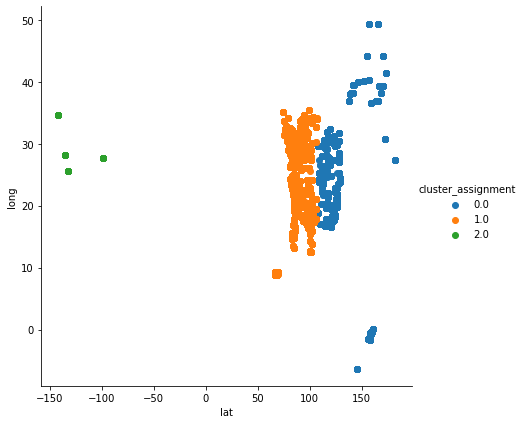

In [70]:
from pyspark.ml.feature import PCA as PCAml
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCAml(k=2, inputCol="busy_season_fly_out_of_features", outputCol="pca")
# pca_model = pca.fit(busy_season_fly_out_of_data)
pca_model = pca.fit(BKMeans_transform)
pca_transformed = pca_model.transform(busy_season_fly_out_of_data)
print('pca_transformed')
print(pca_transformed.show())

# BKMeans_=BisectingKMeans(featuresCol='busy_season_fly_out_of_features', k=3) 
# BKMeans_Model=BKMeans_.fit(busy_season_fly_out_of_data)
# BKMeans_transform=BKMeans_Model.transform(busy_season_fly_out_of_data)
# # BKMeans_transform.show()

# extracting the principal components
X_pca = pca_transformed.rdd.map(lambda row: row.pca).collect()
X_pca = np.array(X_pca)

# Retrieve cluster assigned from the above clustering
cluster_assignment = np.array(BKMeans_transform.rdd.map(lambda row: row.prediction).collect()).reshape(-1,1)


# Plotting the data
pca_data = np.hstack((X_pca,cluster_assignment))

pca_df = pd.DataFrame(data=pca_data, columns=("lat", "long","cluster_assignment"))
sns.FacetGrid(pca_df,hue="cluster_assignment", height=6).map(plt.scatter, "lat", "long").add_legend()
plt.show()

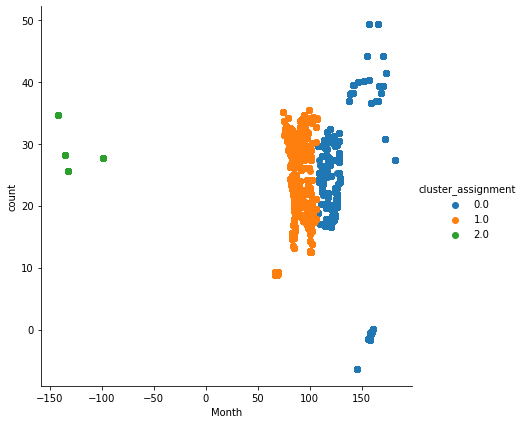

In [12]:
from pyspark.ml.feature import PCA as PCAml
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pca1 = PCAml(k=2, inputCol="busy_season_fly_out_of_features", outputCol="pca")
# pca_model = pca.fit(busy_season_fly_out_of_data)
pca_model1 = pca1.fit(BKMeans_transform)

pca_transformed1 = pca_model1.transform(busy_season_fly_out_of_data)


# BKMeans_=BisectingKMeans(featuresCol='busy_season_fly_out_of_features', k=3) 
# BKMeans_Model=BKMeans_.fit(busy_season_fly_out_of_data)
# BKMeans_transform=BKMeans_Model.transform(busy_season_fly_out_of_data)
# # BKMeans_transform.show()

# extracting the principal components
X_pca1 = pca_transformed1.rdd.map(lambda row: row.pca).collect()
X_pca1 = np.array(X_pca1)

# Retrieve cluster assigned from the above clustering
cluster_assignment1 = np.array(BKMeans_transform.rdd.map(lambda row: row.prediction).collect()).reshape(-1,1)


# Plotting the data
pca_data1 = np.hstack((X_pca1,cluster_assignment1))

pca_df = pd.DataFrame(data=pca_data1, columns=("Month", "count","cluster_assignment"))
sns.FacetGrid(pca_df,hue="cluster_assignment", height=6).map(plt.scatter, "Month", "count").add_legend()
plt.show()

In [ ]:
cluster000 = pass_2_data_features.filter(pass_2_data_features.prediction==0)
cluster111 = pass_2_data_features.filter(pass_2_data_features.prediction==1)
cluster222 = pass_2_data_features.filter(pass_2_data_features.prediction==2)


In [12]:
cluster000.show(3)

+-----+----+------+--------------------+---------+------------+--------------+--------------------+----------+
|Month|iata| count|             airport|      lat|        long|total_DepDelay|            features|prediction|
+-----+----+------+--------------------+---------+------------+--------------+--------------------+----------+
|    3| ORD|556663|Chicago O'Hare In...|41.979595|-87.90446417|     6812098.0|[-87.90446417,41....|         0|
|   10| ORD|548480|Chicago O'Hare In...|41.979595|-87.90446417|     4287455.0|[-87.90446417,41....|         0|
|    1| ORD|546669|Chicago O'Hare In...|41.979595|-87.90446417|     7620616.0|[-87.90446417,41....|         0|
+-----+----+------+--------------------+---------+------------+--------------+--------------------+----------+
only showing top 3 rows



In [ ]:
cluster111.show(3)

In [ ]:
cluster222.show(3)

In [28]:
# import pyspark
# from pyspark.sql import SparkSession

# # data = cluster000
# # columns = ["Month","iata","count","airport","lat","long","total_DepDelay","features","prediction",]


# # pysparkDF = spark.createDataFrame(data = data, schema = columns)
# # pysparkDF.printSchema()

# c00 = cluster000.toPandas()
# c11 = cluster111.toPandas()
# c22 = cluster222.toPandas()



# c00.plot.scatter(x='long',y='lat')
# c11.plot.scatter(x='long',y='lat')
# c22.plot.scatter(x='long',y='lat')
# plt.show()


In [29]:
import pyspark
from pyspark.sql import SparkSession

# data = cluster000
# columns = ["Month","iata","count","airport","lat","long","total_DepDelay","features","prediction",]


# pysparkDF = spark.createDataFrame(data = data, schema = columns)
# pysparkDF.printSchema()

c00 = cluster000.toPandas()
c11 = cluster111.toPandas()
c22 = cluster222.toPandas()



# c00.plot.scatter(x='long',y='lat')
# c11.plot.scatter(x='long',y='lat')
# c22.plot.scatter(x='long',y='lat')
# plt.show()


# fig1 = plt.figure()
# ax1 = fig1.add_subplot(111)

ax = c00.plot.scatter(x='long',y='lat', color="red")
c11.plot.scatter(x='long',y='lat',ax=ax, color="black")

ImportError: Pandas >= 0.23.2 must be installed; however, it was not found.

<AxesSubplot:xlabel='long', ylabel='lat'>

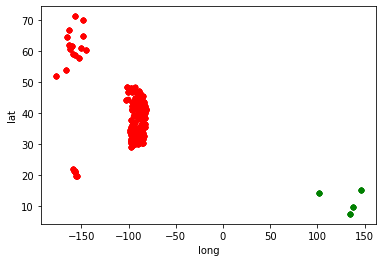

In [47]:
import pyspark
from pyspark.sql import SparkSession

# data = cluster000
# columns = ["Month","iata","count","airport","lat","long","total_DepDelay","features","prediction",]


# pysparkDF = spark.createDataFrame(data = data, schema = columns)
# pysparkDF.printSchema()

c00 = cluster000.toPandas()
c11 = cluster111.toPandas()
c22 = cluster222.toPandas()



# c00.plot.scatter(x='long',y='lat')
# c11.plot.scatter(x='long',y='lat')
# c22.plot.scatter(x='long',y='lat')
# plt.show()


# fig1 = plt.figure()
# ax1 = fig1.add_subplot(111)

ax1 = c00.plot.scatter(x='long',y='lat', color="red")
c22.plot.scatter(x='long',y='lat',ax=ax1, color="green")

In [30]:
from pyspark.ml.feature import PCA as PCAml
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pca1 = PCAml(k=2, inputCol="features", outputCol="pca")
# pca_model = pca.fit(pass_2_data_features)
pca_model1 = pca1.fit(pass_2_data_features)

pca_transformed1 = pca_model1.transform(pass_2_data_features)


# BKMeans_=BisectingKMeans(featuresCol='busy_season_fly_out_of_features', k=3) 
# BKMeans_Model=BKMeans_.fit(pass_2_data_features)
# pass_2_data_features=BKMeans_Model.transform(pass_2_data_features)
# # pass_2_data_features.show()

# extracting the principal components
X_pca1 = pca_transformed1.rdd.map(lambda row: row.pca).collect()
X_pca1 = np.array(X_pca1)

# Retrieve cluster assigned from the above clustering
cluster_assignment1 = np.array(pass_2_data_features.rdd.map(lambda row: row.prediction).collect()).reshape(-1,1)


# Plotting the data
pca_data1 = np.hstack((X_pca1,cluster_assignment1))

pca_df = pd.DataFrame(data=pca_data1, columns=("lat", "long","cluster_assignment"))
sns.FacetGrid(pca_df,hue="cluster_assignment", height=6).map(plt.scatter, "lat", "long").add_legend()
plt.show()

ImportError: this version of pandas is incompatible with numpy < 1.20.3
your numpy version is 1.18.5.
Please upgrade numpy to >= 1.20.3 to use this pandas version

In [5]:

from pyspark.sql import functions as F
from pyspark.sql import types as T



# September through November is Fall, December through February is Winter, March through May is Spring, June through August is Summer

    


@F.udf(returnType=T.StringType())
def mapMonthToSeason(month):
    if 9<=month<=11:
        return "fall"
    elif month == 12 or month == 1 or month ==2:
        return "winter"
    elif 3<=month<=5:
        return "spring"
    else:
        return "summer"



# mapping flight records to their season
season_dataframe = raw.select('Month').withColumn('Month',mapMonthToSeason(F.col('Month'))).withColumnRenamed('Month','Season')\
                                      .groupBy('Season')\
                                      .count()\
                                      .show()
    

+------+--------+
|Season|   count|
+------+--------+
|winter|29731012|
|summer|29596848|
|spring|30254195|
|  fall|29332403|
+------+--------+



**Which airport as the origin has the most delays?**

**Which airport as the destination has the most delays?**

**Which Seasons have the most delays?**

**Feature Exploration and Distribution Analysis**